#### Общие соображения

Пьяница делает шаги назад и вперед.

p(back) = b = 2/3

p(forward) = f = 1/3

Так как шаги случайны, то вероятность последовательности шагов  pass_1, ... pass_j 
равна произведению вероятностей p(pass_1), ..., p(pass_j).

Пусть f(N) - вероятность того, что после N шагов пьяница не упал

#### N = 1

С вероятностью 2/3 пьяница сделает шаг назад и не упадет, и с вероятностью 1/3 он сделает шаг вперед и упадет.

f(1) = 2/3

#### N = 2

Набор возможных шагов для N=2:

    назад назад - не упал
    назад вперед - не упал
    вперед назад - упал
    вперед вперед - упал

Значит, вероятность того, что пьяница не упал после двух шагов, равна вероятности того, 
что он сделал 2 шага назад или 1 шаг назад и 1 шаг вперед.

f(2) = p(back, back) + p(back, forward) = b\*b + b\*f = b*(b+f) = b = 2/3

#### N = 3

Пьяница не упадет после третьего шага, только если он не упадет после второго, поэтому набор шагов для N=3 будет начинаться либо с "назад назад", либо с "назад вперед":

    назад назад вперед
    назад назад назад
    назад вперед назад (если количество назад и вперед одинаковое, то только назад можно пойти)
  
f(3) = p(b, b, f) + p(b, b, b) + p(b, f, b) = b\*b\*f + b\*b\*b + b\*f\*b = b^2 \* (2*f + b) = 16/27

#### N = 4

Пьяница не упадет после четвертого шага, только если он не упадет после третьего, поэтому набор шагов для N=4 будет начинаться либо с "назад назад вперед", либо с "назад назад назад", либо с "назад вперед назад":

    назад назад вперед назад
    назад назад вперед вперед
    назад назад назад назад
    назад назад назад вперед
    назад вперед назад назад
    назад вперед назад вперед
    
(так как за нечетное количество шагов невозможно снова оказаться у пропасти (количество шагов назад и вперед должно быть для этого одинаково, то есть N должно быть четным), то для того чтобы получить комбинации шагов для N = 2\*k, достаточно к каждой комбинации шагов N = 2\*k-1 добавить назад и вперед, и после любой из них пьяница все еще не упадет, а так как вероятность пойти назад ИЛИ вперед равна единице после любой из комбинаций, то f(N) = f(N-1) для любых четных N)
  
f(4) = p(b, b, f, b) + p(b, b, f, f) + p(b, b, b, b) + p(b, b, b, f) + p(b, f, b, b) + p(b, f, b, f) = 
       
    = b*b*f*(b+f) + b*b*b*(b+f) + b*f*b*(b+f) = b*b*f + b*b*b + b*f*b = b^2 * (2*f + b) = 16/27

#### N = 5

Наборы шагов для N=5, после которых пьяница не упадет:
    
    назад назад вперед назад назад
    назад назад вперед назад вперед
    назад назад вперед вперед назад
    назад назад назад назад назад
    назад назад назад назад вперед
    назад назад назад вперед назад
    назад назад назад вперед вперед
    назад вперед назад назад назад
    назад вперед назад назад вперед
    назад вперед назад вперед назад
    
f(5) = p(b,b,f,b,b) + p(b,b,f,b,f) + p(b,b,f,f,b) + p(b,b,b,b,b) + p(b,b,b,b,f) + p(b,b,b,f,b) + p(b,b,b,f,f) +
    
    + p(b,f,b,b,b) + p(b,f,b,b,f) + p(b,f,b,f,b) = 
    
    = b*b*f*b*b + b*b*f*b*f + b*b*f*f*b + b*b*b*b*b + b*b*b*b*f + b*b*b*f*b + b*b*b*f*f + b*f*b*b*b + b*f*b*b*f + 
        b*f*b*f*b = 
    
    = b^3 * (b*f + f*f + f*f + b*b + b*f + f*b + f*f + b*f + f*f + f*f) = b^3 * (5*f^2 + 4*b*f + b^2) = 136/243

In [64]:
136/243

0.5596707818930041

#### N - произвольное

In [6]:
import numpy as np

In [7]:
def alive(n):
    if n < 0:
        p = 'Check again N'
    elif n == 0:
        p = 1
    elif n == 2:
        p = 2/3
    elif n%2 != 0:
        p = alive(n+1)
    else:
        b = 2/3
        f = 1/3
        way = [[b,b], [b,f]]
        way2 = [[b,b], [b,f]]
        while len(way2[0]) != n:
            for i in range(0, len(way)):
                if way[i].count(b) != way[i].count(f):
                    way2 += [way[i] + [b,b], way[i] + [b,f], way[i] + [f,f], way[i] + [f,b]]
                    del way2[0]
                else:
                    way2 += [way[i] + [b,f], way[i] + [b,b]]
                    del way2[0]
            way = way2[:]
        p=0
        for i in way2:
            p += np.prod(i)
    return p

In [8]:
alive(5)

0.55967078189300379

Предварительные рассчеты подтвердились!

#### Построим функцию alive(n)

In [1]:
import matplotlib.pyplot as plt

In [36]:
plt.title('Probability of being alive')
plt.ylabel('Probability')
plt.xlabel('N')
Ns = np.arange(0, 24, 1)
for N in Ns:
    plt.plot(N, alive(N), 'bo')

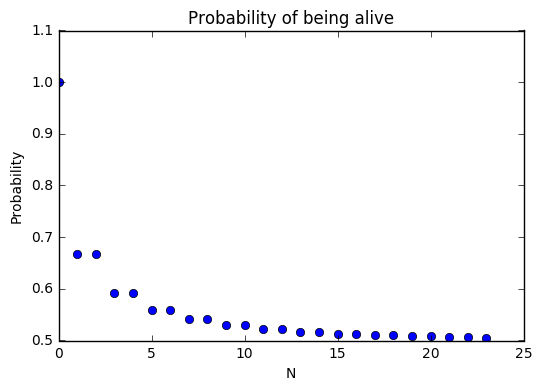

In [41]:
plt.show()